In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [2]:
df=pd.read_csv("Auto_Sales_data.csv")
df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [3]:
df.shape

(2747, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [5]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098952,6.491081,3553.047583,1757.085912,100.691664
std,91.877521,9.762135,42.042549,4.230544,1838.953901,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,3562.000000,214.000000


In [6]:
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['COUNTRY'].unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [9]:
df['PRODUCTLINE'].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [10]:
PRICE_EACH_TYPE = df.groupby('PRODUCTLINE').agg({'QUANTITYORDERED':'sum','PRICEEACH': 'mean'})
print(PRICE_EACH_TYPE)

                  QUANTITYORDERED   PRICEEACH
PRODUCTLINE                                  
Classic Cars                33373  115.195680
Motorcycles                 11080   99.767125
Planes                      10636   90.517829
Ships                        7989   88.169261
Trains                       2712   84.108701
Trucks and Buses            10579  104.344983
Vintage Cars                20059   90.011261


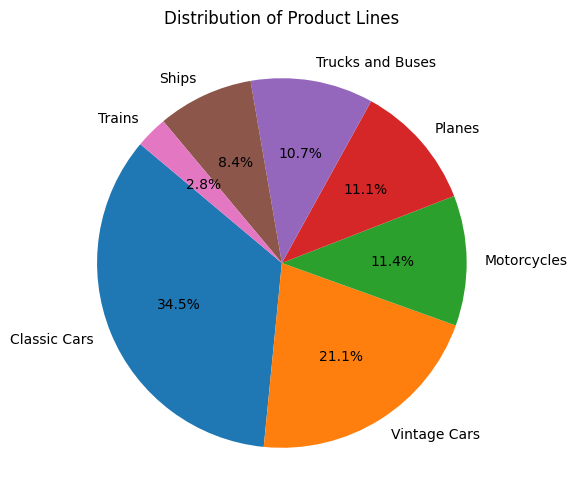

In [20]:
productline_counts = df['PRODUCTLINE'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(productline_counts, labels=productline_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Product Lines')
plt.show()

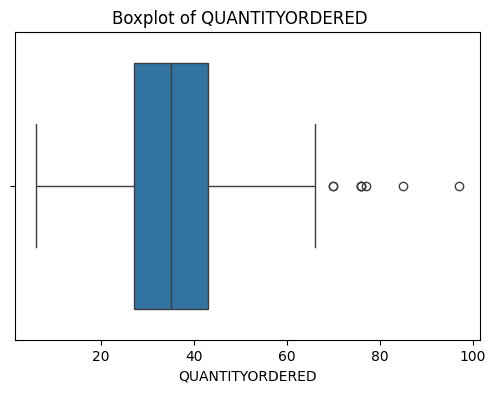

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['QUANTITYORDERED'])
plt.title('Boxplot of QUANTITYORDERED   ')
plt.show()


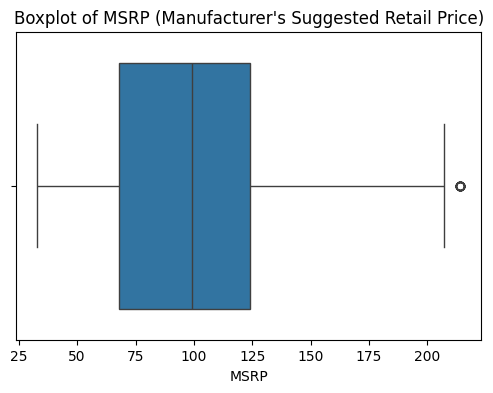

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['MSRP'])
plt.title("Boxplot of MSRP (Manufacturer's Suggested Retail Price)")
plt.show()

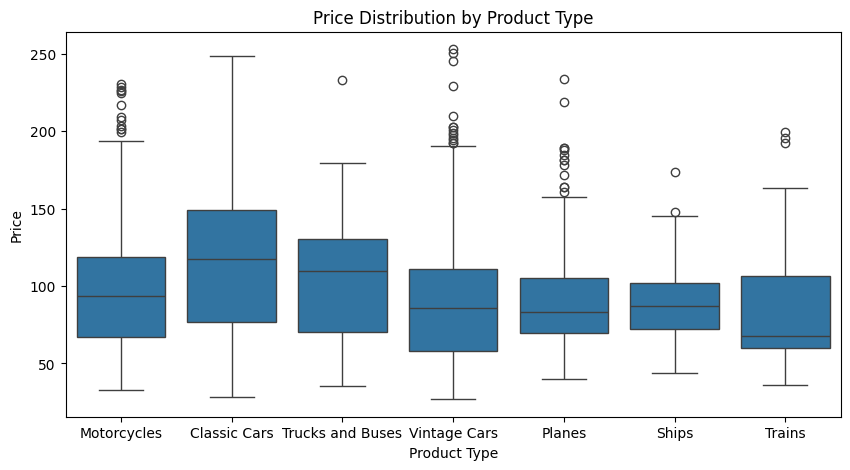

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='PRODUCTLINE', y='PRICEEACH', data=df)
plt.title('Price Distribution by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Price')
plt.show()

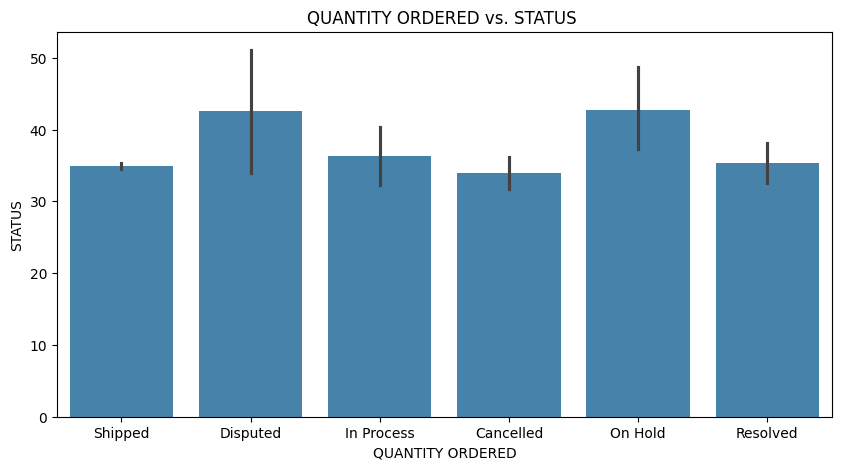

In [16]:
plt.figure(figsize=(10,5))

sns.barplot(data=df,y='QUANTITYORDERED',x='STATUS',alpha=0.9)
plt.title('QUANTITY ORDERED vs. STATUS ')
plt.xlabel('QUANTITY ORDERED')
plt.ylabel('STATUS')
plt.show()

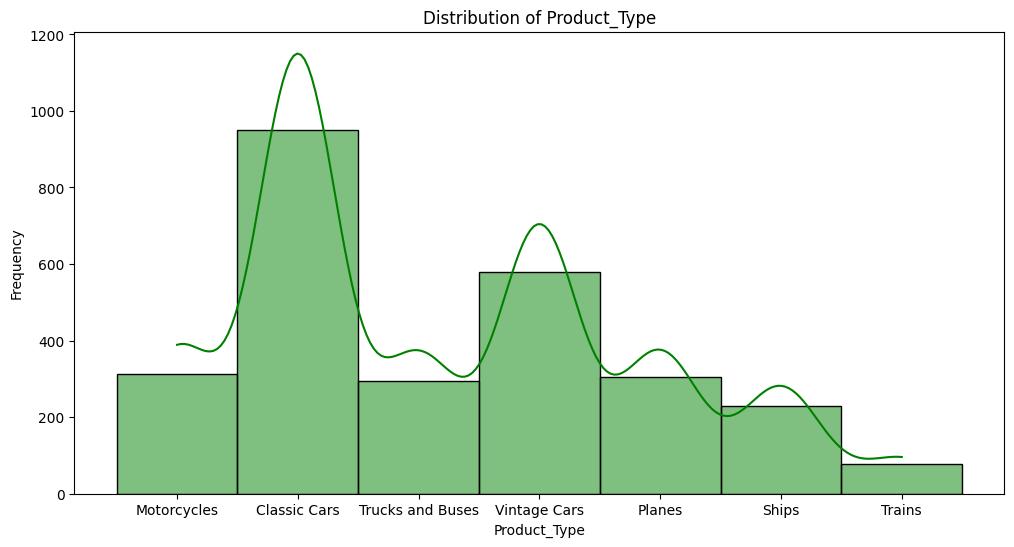

In [17]:
plt.figure(figsize=(12,6))
sns.histplot(df['PRODUCTLINE'], bins=10, kde=True, color='green')
plt.title('Distribution of Product_Type')
plt.xlabel('Product_Type')
plt.ylabel('Frequency')
plt.show()

<Axes: >

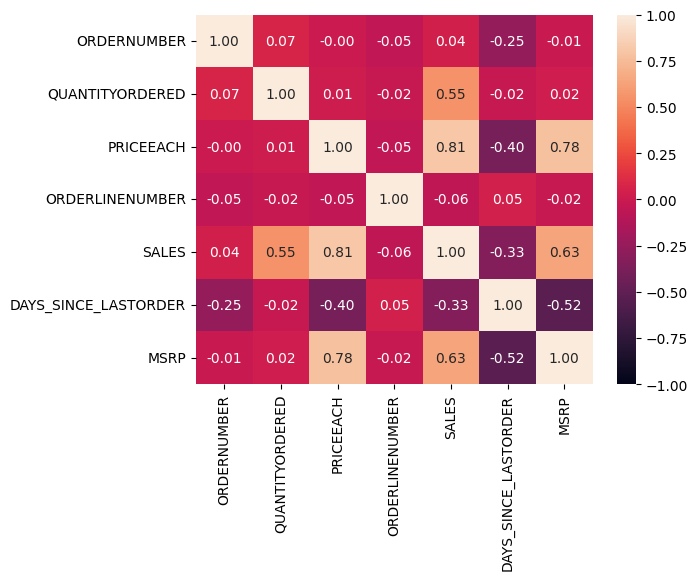

In [18]:
numeric_attribute = df.select_dtypes(include=['number'])
correlation_matrix = numeric_attribute.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', vmin=-1, vmax=1)

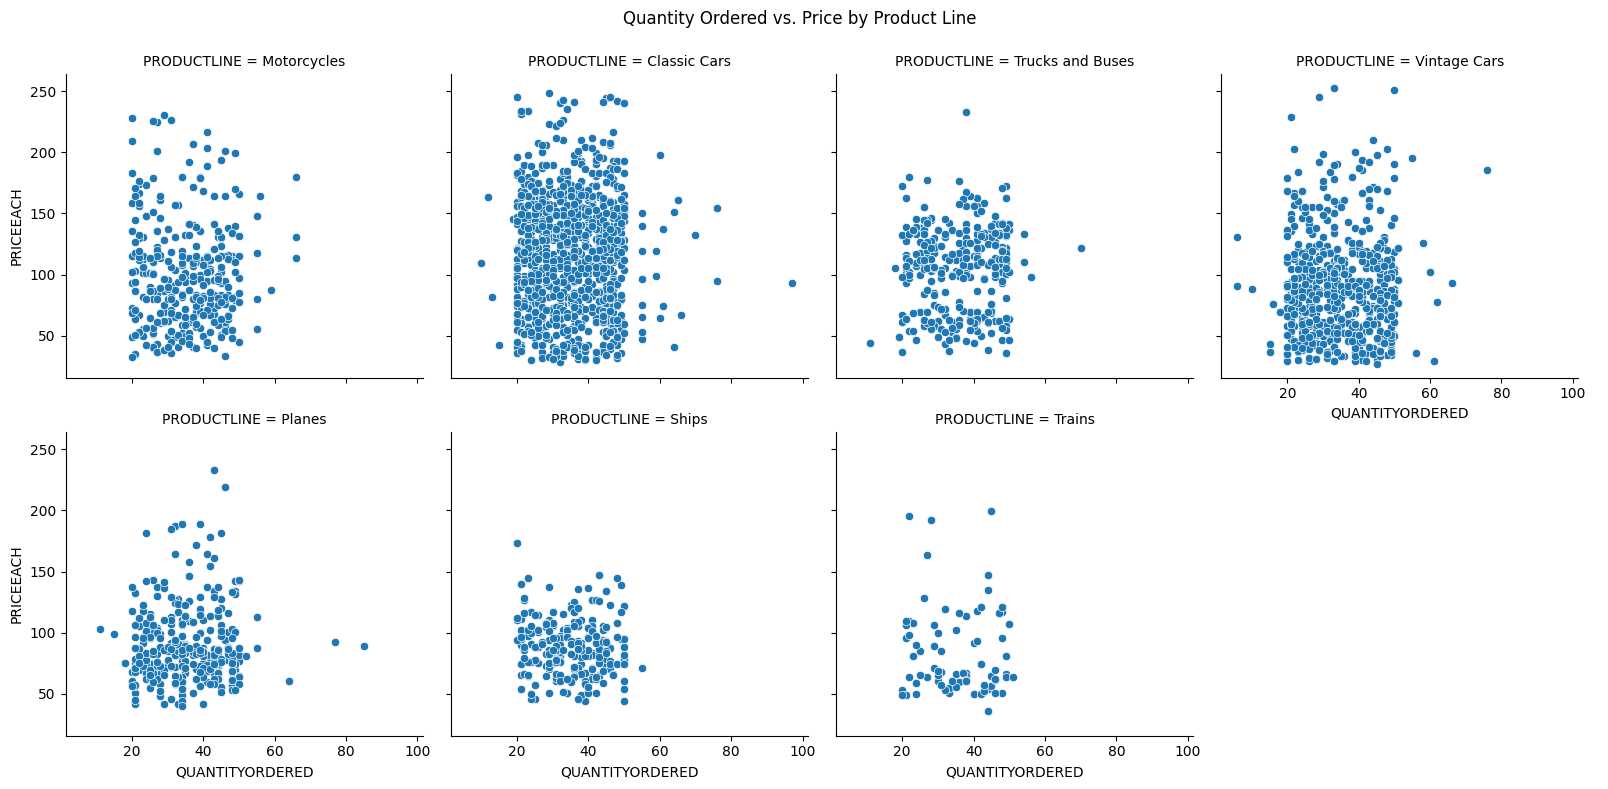

In [24]:
g = sns.FacetGrid(df, col='PRODUCTLINE', col_wrap=4, height=4)
g.map(sns.scatterplot, 'QUANTITYORDERED', 'PRICEEACH')
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Quantity Ordered vs. Price by Product Line')
plt.show()